In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data.dataset_normalized import NormalizedModelNet40
import os
import numpy as np

from utils import *
from model3 import Encoder
from torch.utils.data import DataLoader, Subset
import torch
from evaluate import *
from train import train

In [3]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    print(torch.cuda.get_device_name(0))
device

Tesla V100-SXM2-32GB


'cuda'

### Getting the dataset path

In [4]:
dataset_name = "modelnet40_ply_hdf5_2048"

os.chdir('..')
modelnet40_path = os.path.join(os.getcwd(), dataset_name)
os.chdir('TransformersFor3dPointCLouds')
print(modelnet40_path)

/scratch/users/ahamadeh18/COMP390/modelnet40_ply_hdf5_2048


### Dataset path when training locally

In [5]:
# dataset_path = os.path.join(os.getcwd(), os.path.join("data", "dataset_path.txt"))
# with open(dataset_path, 'r') as file:
#     modelnet40_path = file.readline()
# modelnet40_path = modelnet40_path.split('\n')[0]
# modelnet40_path

# Overfitting experiment

### Initalizing the training set DataLoader object

In [11]:
SAMPLE_SIZE = 256
partition = 'train'
SAMPLING_METHOD = 'fps'
batch_size = 10

In [12]:
dataset = NormalizedModelNet40(dataset_path=modelnet40_path, partition=partition,
                               sample_size=SAMPLE_SIZE, sampling_method=SAMPLING_METHOD)

In [13]:
class_ind_dist = dataset.class_indicies_distribution()

In [14]:
overfit_classes_num = 1
OVERFITTING_SAMPLE_SIZE = 10
overfitting_set = []
for i in range(overfit_classes_num):
    overfitting_set += class_ind_dist[i][:OVERFITTING_SAMPLE_SIZE]

In [15]:
overfitting_subset = Subset(dataset, overfitting_set)
overfitting_loader = DataLoader(overfitting_subset, batch_size=batch_size, shuffle=True)

## Overfitting the model

In [16]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss().to(device)

# Trying the new model:

In [17]:
input_dims = 3
embed_dim = 256
out_dims = 8
num_layers = 6
num_heads = 1
num_classes = 40
dropout = 0.0

In [18]:
model = Encoder(input_size=SAMPLE_SIZE, input_dims=input_dims, embed_dim=embed_dim, 
                out_dims=out_dims, num_layers=num_layers, num_heads=num_heads,
                num_classes=num_classes, dropout=dropout).to(device)

In [19]:
torch.autograd.set_detect_anomaly(True)

In [20]:
from torch.optim import SGD, Adam
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR

parameters = model.parameters()
learning_rate = 1e-4
weight_decay = 1e-1
momentum = 0.9

# optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)
optimizer = Adam(parameters, lr=learning_rate, amsgrad=True)
epochs = 10
scheduler = StepLR(optimizer=optimizer, step_size=epochs // 4, gamma=0.8)

In [21]:
# scheduler = None
loss,_,_,_ = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=overfitting_loader, 
             validation_loader=overfitting_loader,
          criterion=criterion, epochs=epochs, verbose=False)

Current device: cuda


100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

Evaluating epoch...



C:\Users\abooo\anaconda3\envs\comp411\lib\site-packages\torch\optim\lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Epoch: 0 | Loss: 3.27 | Train accuracy: 0.0 | Validation Accuracy: 100.0| Runtime: 2.51 seconds


100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


Epoch: 1 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Epoch: 2 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 3 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 4 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 5 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Epoch: 6 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 7 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Epoch: 8 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

Epoch: 9 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.12 seconds


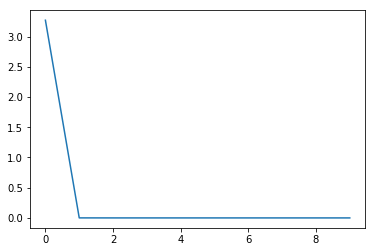

In [22]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [23]:
accuracy = eval_2(model, overfitting_loader)

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


In [24]:
print(f'Overfitting accuracy: {accuracy}%') 

100.0%


# End of trying the new model

# Start training the actual model

### Defining the dataset and splitting it:

In [5]:
SAMPLE_SIZE = 512
SAMPLING_METHOD = 'fps'
batch_size = 128

In [6]:
train_dataset = NormalizedModelNet40(dataset_path=modelnet40_path, partition='train',
                               sample_size=SAMPLE_SIZE, sampling_method=SAMPLING_METHOD)

test_dataset = NormalizedModelNet40(dataset_path=modelnet40_path, partition='test',
                               sample_size=SAMPLE_SIZE, sampling_method=SAMPLING_METHOD)

In [7]:
train_portion = 0.9

N = len(train_dataset)

n_train = int(N * 0.9)
n_validation = N - n_train

In [8]:
train_set, validation_set = torch.utils.data.random_split(train_dataset, [n_train , n_validation])

train_loader = DataLoader(dataset=train_set, batch_size=batch_size)
validation_loader = DataLoader(dataset=validation_set, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

### Creating the model:

In [9]:
input_dims = 3
embed_dim = 256
out_dims = 8
num_layers = 6
num_heads = 1
num_classes = 40
dropout = 0.5

In [10]:
model = Encoder(input_size=SAMPLE_SIZE, input_dims=input_dims, embed_dim=embed_dim, 
                out_dims=out_dims, num_layers=num_layers, num_heads=num_heads,
                num_classes=num_classes, dropout=dropout).to(device)

### Optimizer:

In [11]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9
weight_decay = 1e-5

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=3, verbose=True)

### Loss function:

In [12]:
from torch.nn import CrossEntropyLoss

class_weights = torch.tensor(train_dataset.calculate_class_weights()).float().to(device=device)
criterion = CrossEntropyLoss(weight=class_weights).to(device=device)

In [ ]:
epochs = 150
loss, runtime, train_acc, validation_acc = train(model=model, optimizer=optimizer,
                                    scheduler=scheduler, train_loader=train_loader,
                                    validation_loader=validation_loader, criterion=criterion,
                                    epochs=epochs, verbose=False)

Current device: cuda


100%|██████████| 70/70 [07:43<00:00,  6.63s/it]

Evaluating epoch...



100%|██████████| 8/8 [00:49<00:00,  6.14s/it]


Epoch: 0 | Loss: 237.18 | Train acc: 17.01 | Val acc: 23.44 | lr: 0.0001 | Runtime: 513.01 seconds


 26%|██▌       | 18/70 [01:59<05:43,  6.61s/it]

### Average epoch time:

In [ ]:
runtime = np.array(runtime)
print(f'Average epoch runtime: {np.mean(runtime / 60):.2f} mins')

In [ ]:
runtime_ = np.sum(runtime)
print(f'Total runtime: {runtime / 60:.2f} mins | {runtime / 3600:.2f} hours')

### Plotting the loss:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.title("Loss") 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss)

In [ ]:
figure(figsize=(10, 4), dpi=80)

plt.title("Accuracy") 
plt.plot(train_acc)
plt.plot(validation_acc)

plt.scatter(list(range(epochs)), train_acc)
plt.scatter(list(range(epochs)), validation_acc)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.show()

In [ ]:
accuracy = eval_2(model, test_loader)

In [ ]:
print(f'{accuracy:.2f}%')

### Saving the model:

In [20]:
import utils
model_path = os.path.join(os.getcwd(), "model")
utils.save_model(model, model_path)

### Load the model:

In [21]:
# model_state_dict = utils.load_model_state_dict(model_path)
# model = model.load_state_dict(model_state_dict)

## Class accuracy:

In [ ]:
nb_classes = 40

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes, _) in tqdm(enumerate(test_loader)):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs.float())
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1


In [ ]:
class_accuracies = confusion_matrix.diag()/confusion_matrix.sum(1)
class_acc_dict = dict(zip(train_dataset.CLASSES, class_accuracies.tolist()))
class_acc_dict

In [ ]:
figure(figsize=(15, 4), dpi=80)
plt.title('Class accuracies')
y = class_accuracies.tolist()
x = test_dataset.CLASSES
plt.bar(x, y, color='b')
plt.xticks(x, x, rotation=90)
plt.show()

In [ ]:
all_labels = np.concatenate((train_dataset.labels, test_dataset.labels))

In [ ]:
figure(figsize=(15, 4), dpi=80)
y = np.bincount(all_labels)
x = train_dataset.CLASSES

plt.bar(x, y, color='b')
plt.xticks(x, x, rotation=90)
plt.show()